In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf




from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.compat.v1.Session(config=config) 
tf.compat.v1.keras.backend.set_session(sess)

#import training set
data_train=pd.read_csv('Google_Stock_Price_train.csv')
training_set=data_train.iloc[:,1:2].values
sc=MinMaxScaler(feature_range=(0,1))

training_set_scaled=sc.fit_transform(training_set)
X_train=[]
y_train=[]

for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50,))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(X_train,y_train,epochs=100,batch_size=32)


Using TensorFlow backend.


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5349457132021021713
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3135687884
locality {
  bus_id: 1
  links {
  }
}
incarnation: 114579747939062831
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0378
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 6s 5m

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 92/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 93/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 94/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 95/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014


In [2]:
data_test=pd.read_csv('Google_Stock_Price_test.csv')
testing_set=data_test.iloc[:,1:2].values

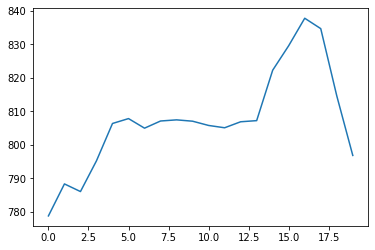

In [3]:
pl.plot(testing_set)

In [4]:
dataset_total=pd.concat((data_train['Open'],data_test['Open']),axis=0)

In [5]:
inputs=dataset_total[len(dataset_total)-len(data_test)-60:].values

In [6]:
inputs=inputs.reshape(-1,1)

In [7]:
inputs=sc.transform(inputs)

In [8]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

In [9]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [10]:
predictor=regressor.predict(X_test)
predictor=sc.inverse_transform(predictor)

In [11]:
predictor

array([[772.845  ],
       [770.0924 ],
       [769.69006],
       [770.7189 ],
       [773.85034],
       [779.58856],
       [785.4165 ],
       [788.5664 ],
       [789.45465],
       [789.1271 ],
       [788.433  ],
       [787.7228 ],
       [787.2346 ],
       [787.521  ],
       [788.3967 ],
       [792.4991 ],
       [799.1371 ],
       [806.7654 ],
       [811.7205 ],
       [809.1777 ]], dtype=float32)

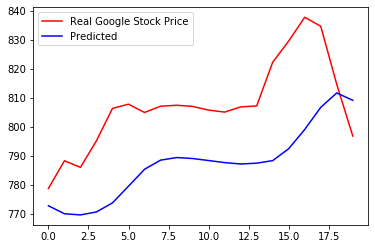

In [12]:
pl.plot(testing_set,c='red',label="Real Google Stock Price")
pl.plot(predictor,c='b',label="Predicted")
pl.legend()
pl.show()

In [13]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(testing_set, predictor))
rmse

23.25928257320777